### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import time
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.patheffects as PathEffects
%matplotlib inline

from sklearn.decomposition import PCA

from sklearn import preprocessing
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

plt.style.use('seaborn-darkgrid')



### Loading dataset

In [2]:
df = pd.read_excel('../data/Dry_Bean_Dataset.xlsx')

df.sample(frac = 1)

df.head()

X = df.drop('Class', axis = 1).to_numpy()

y = df['Class'].to_numpy()

In [3]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

### A. Plot the class distribution and analyze

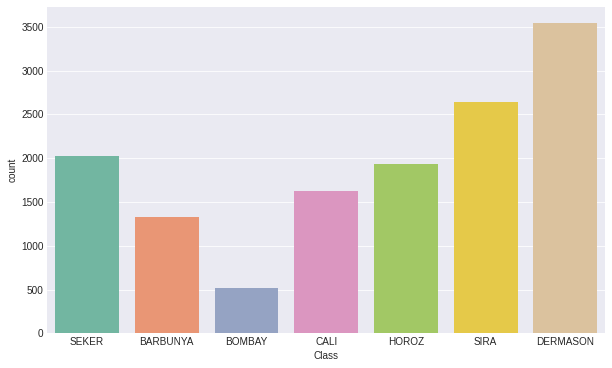

In [4]:
plt.figure(figsize=(10,6))

sns.countplot(data = df, x = 'Class', palette = 'Set2')

We can see there are 7 classes so this will be a multiclass classification problem. The count of Dermason is highest among the classes meanwhile bombay has the lowest count.

### B. EDA

In [5]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

In [6]:
df.isnull().sum().sum()

0

No missing value.

In [7]:
df.corr()

Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966722         0.931834         0.951602   
Perimeter        0.966722   1.000000         0.977338         0.913179   
MajorAxisLength  0.931834   0.977338         1.000000         0.826052   
MinorAxisLength  0.951602   0.913179         0.826052         1.000000   
AspectRation     0.241735   0.385276         0.550335        -0.009161   
Eccentricity     0.267481   0.391066         0.541972         0.019574   
ConvexArea       0.999939   0.967689         0.932607         0.951339   
EquivDiameter    0.984968   0.991380         0.961733         0.948539   
Extent           0.054345  -0.021160        -0.078062         0.145957   
Solidity        -0.196585  -0.303970        -0.284302        -0.155831   
roundness       -0.357530  -0.547647        -0.596358        -0.210344   
Compactness     -0.268067  -0.406857        -0.568377        -0.015066   
ShapeFactor1    -0.847958  -0.864623        -0.773609        -0.947204   
ShapeFactor2    -0.639291  -0.767592        -0.859238        -0.471347   
ShapeFactor3    -0.272145  -0.408435        -0.568185        -0.019326   
ShapeFactor4    -0.355721  -0.429310        -0.482527        -0.263749   

                 AspectRation  Eccentricity  ConvexArea  EquivDiameter  \
Area                 0.241735      0.267481    0.999939       0.984968   
Perimeter            0.385276      0.391066    0.967689       0.991380   
MajorAxisLength      0.550335      0.541972    0.932607       0.961733   
MinorAxisLength     -0.009161      0.019574    0.951339       0.948539   
AspectRation         1.000000      0.924293    0.243301       0.303647   
Eccentricity         0.924293      1.000000    0.269255       0.318667   
ConvexArea           0.243301      0.269255    1.000000       0.985226   
EquivDiameter        0.303647      0.318667    0.985226       1.000000   
Extent              -0.370184     -0.319362    0.052564       0.028383   
Solidity            -0.267754     -0.297592   -0.206191      -0.231648   
roundness           -0.766979     -0.722272   -0.362083      -0.435945   
Compactness         -0.987687     -0.970313   -0.269922      -0.327650   
ShapeFactor1         0.024593      0.019920   -0.847950      -0.892741   
ShapeFactor2        -0.837841     -0.860141   -0.640862      -0.713069   
ShapeFactor3        -0.978592     -0.981058   -0.274024      -0.330389   
ShapeFactor4        -0.449264     -0.449354   -0.362049      -0.392512   

                   Extent  Solidity  roundness  Compactness  ShapeFactor1  \
Area             0.054345 -0.196585  -0.357530    -0.268067     -0.847958   
Perimeter       -0.021160 -0.303970  -0.547647    -0.406857     -0.864623   
MajorAxisLength -0.078062 -0.284302  -0.596358    -0.568377     -0.773609   
MinorAxisLength  0.145957 -0.155831  -0.210344    -0.015066     -0.947204   
AspectRation    -0.370184 -0.267754  -0.766979    -0.987687      0.024593   
Eccentricity    -0.319362 -0.297592  -0.722272    -0.970313      0.019920   
ConvexArea       0.052564 -0.206191  -0.362083    -0.269922     -0.847950   
EquivDiameter    0.028383 -0.231648  -0.435945    -0.327650     -0.892741   
Extent           1.000000  0.191389   0.344411     0.354212     -0.141616   
Solidity         0.191389  1.000000   0.607150     0.303766      0.153388   
roundness        0.344411  0.607150   1.000000     0.768086      0.230273   
Compactness      0.354212  0.303766   0.768086     1.000000     -0.009394   
ShapeFactor1    -0.141616  0.153388   0.230273    -0.009394      1.000000   
ShapeFactor2     0.237956  0.343559   0.782824     0.868939      0.469197   
ShapeFactor3     0.347624  0.307662   0.763126     0.998686     -0.008320   
ShapeFactor4     0.148502  0.702163   0.472149     0.484436      0.248619   

                 ShapeFactor2  ShapeFactor3  ShapeFactor4  
Area                -0.639291     -0.272145     -0.355721  
Perimeter           -0.767592     -0.408435     -0.429310  
MajorAxisLeng

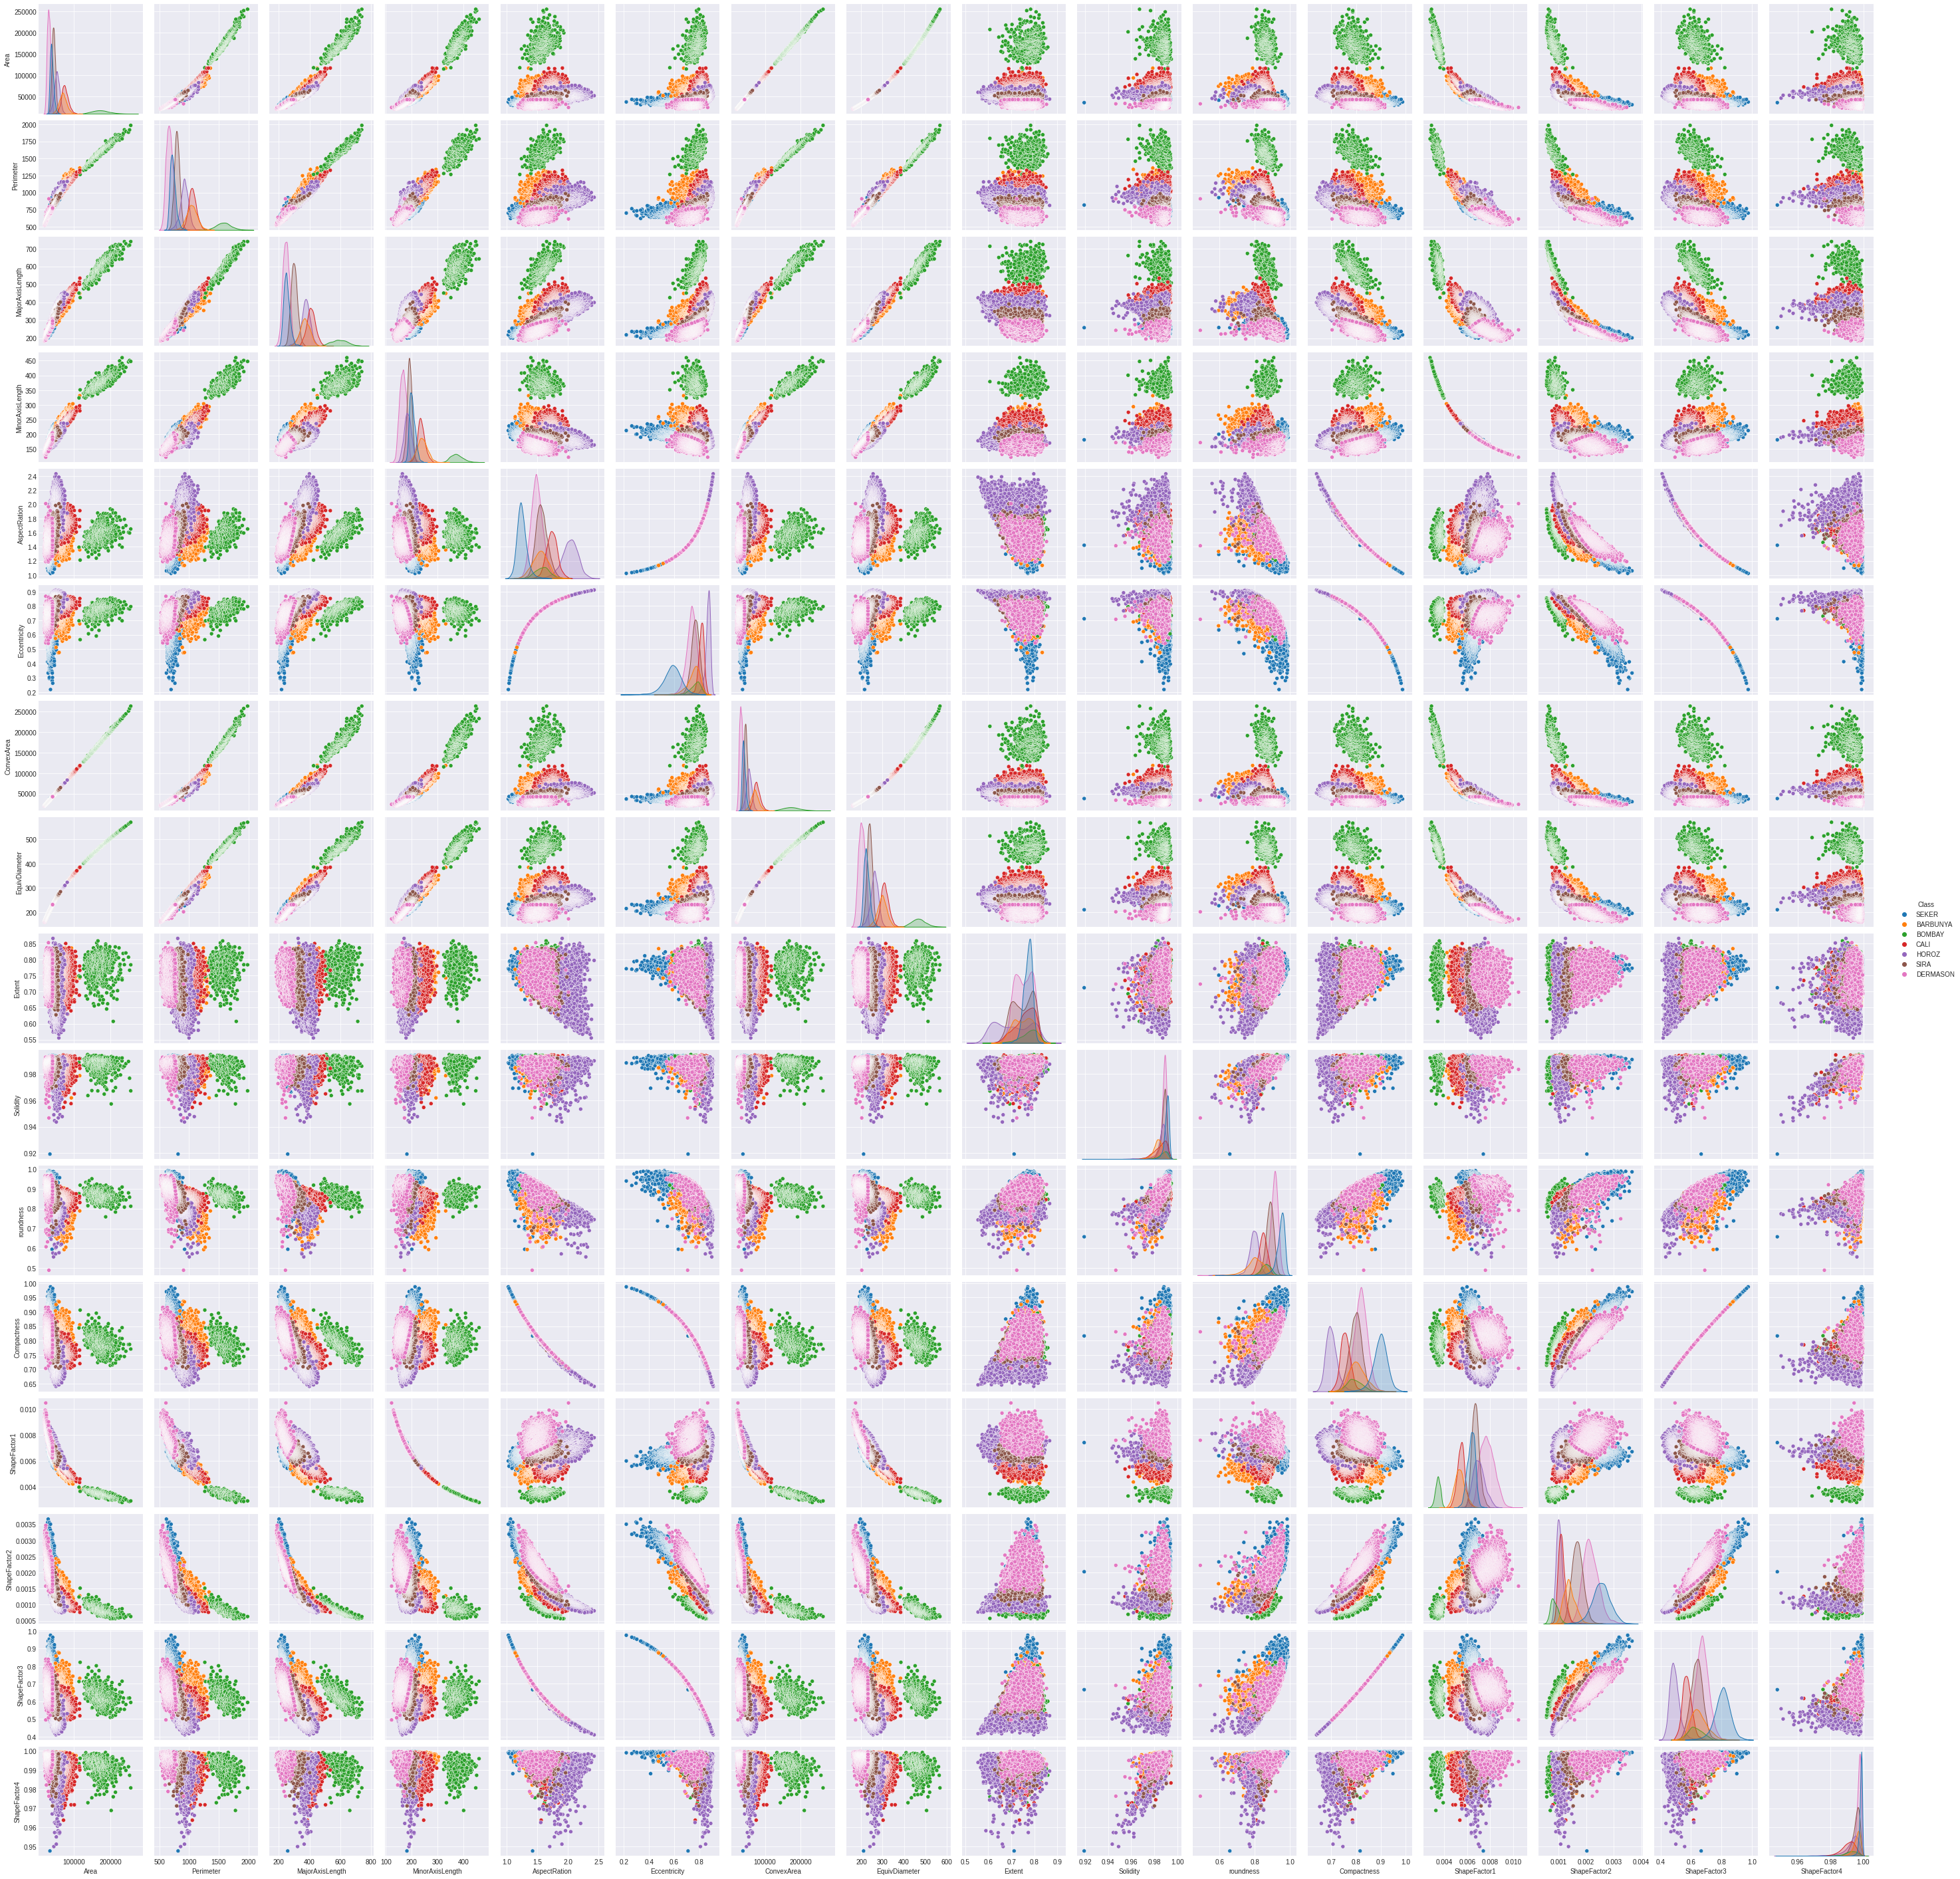

In [8]:
sns.pairplot(df, hue = 'Class')


- Area,Convex Area, Equiv Diameter
- Minor Axis Length,ShapeFactor1
- Aspect Ratio, Eccentricity, Compactness, ShapeFactor3
- 
bombay is an outlier

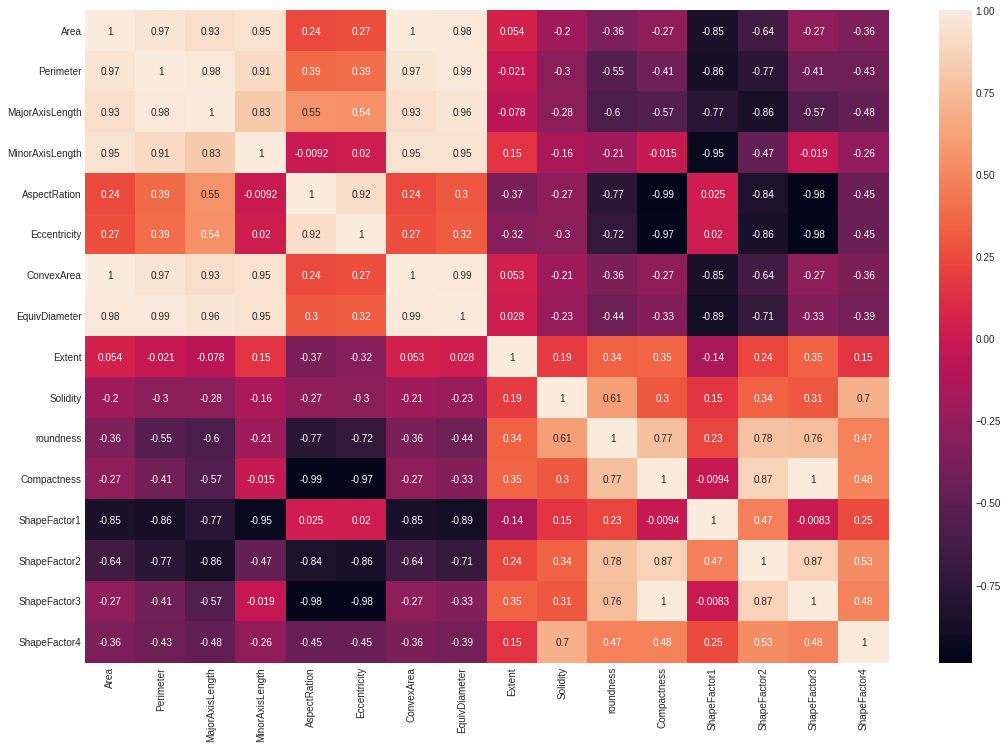

In [9]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True)

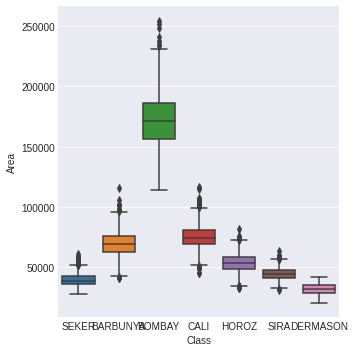

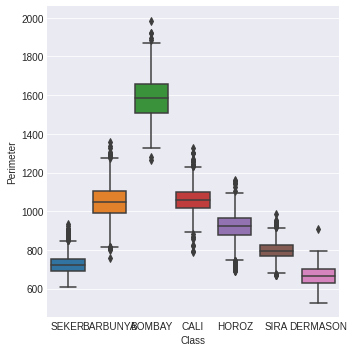

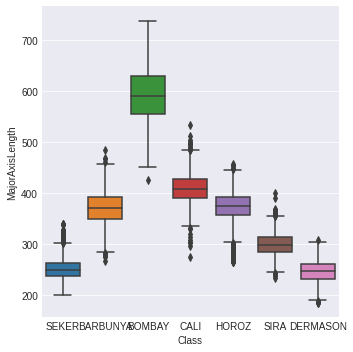

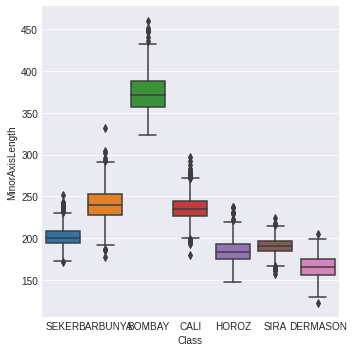

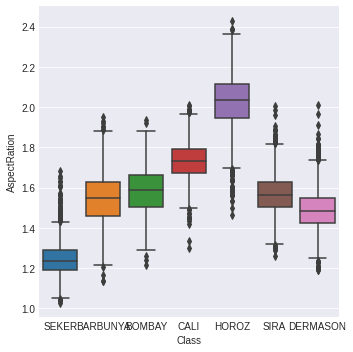

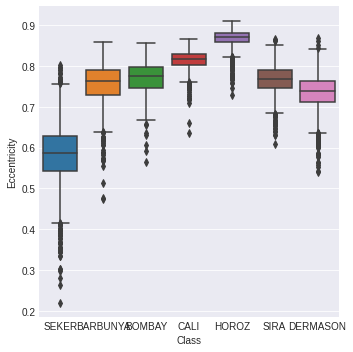

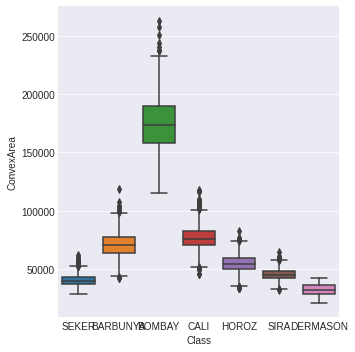

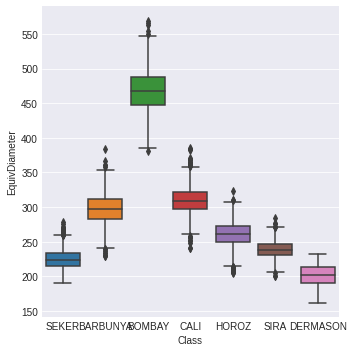

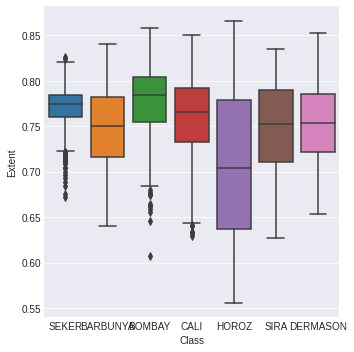

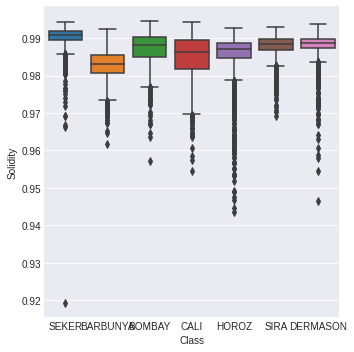

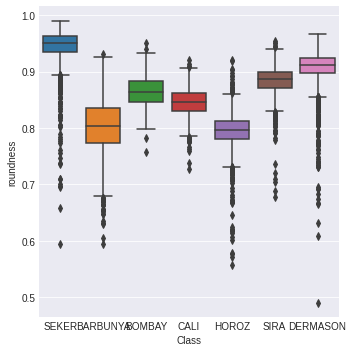

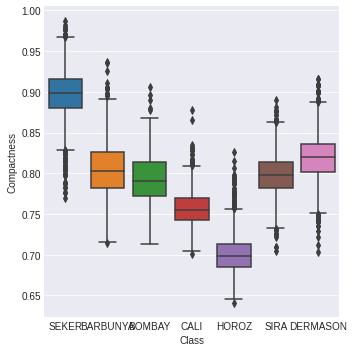

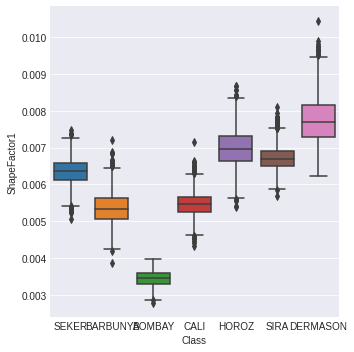

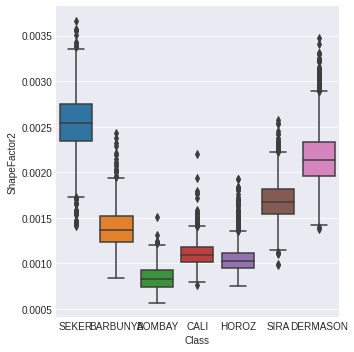

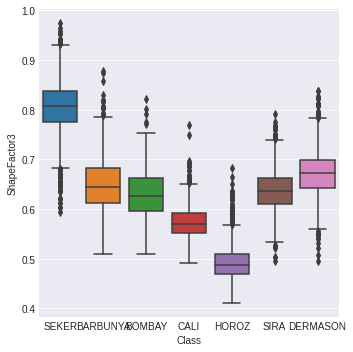

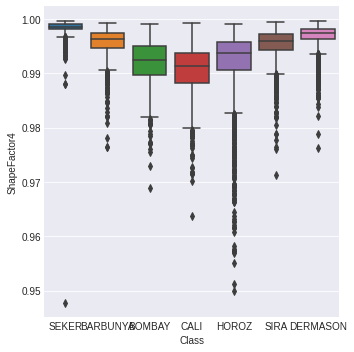

In [10]:
for c in df.drop('Class', axis = 1).columns:
    sns.catplot(data = df,x = 'Class',y = c, kind ='box')

# sns.catplot(data = df,x = 'Class',y = 'Solidity', kind ='box')

- All classes have similar Solidity which means this feature is useless.
- Convex Area: hte box plots are thin meaning low variance. 

### C. Using TSNE

In [11]:
tsne = TSNE(n_components=2, learning_rate = 'auto', random_state=0, perplexity = 30)
tsne_results = tsne.fit_transform(X)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


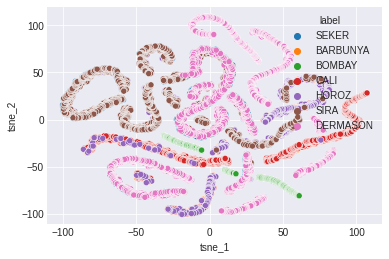

In [12]:
tsne_results_df = pd.DataFrame(data = tsne_results, columns = ['tsne_1', 'tsne_2'])
tsne_results_df['label'] = df['Class']

sns.scatterplot(data = tsne_results_df, x = 'tsne_1', y = 'tsne_2', hue = 'label')

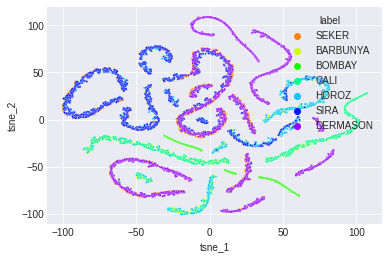

In [13]:

sns.scatterplot(data = tsne_results_df, x = 'tsne_1', y = 'tsne_2', hue = 'label', s = 3, palette='gist_rainbow')



I took perplexity as 30.
- Bombay has low correlation with all the other classes.
- Sira has correlation with dermason, horoz.
- Cali has correlation with horoz.
- Dermason has correlation with seker.
- Barbunya has correlation with horoz.

### D. Run Sklearn’s implementation of Naive Bayes

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print('accuracy: ',accuracy_score(y_test, y_pred))

print('recall: ',recall_score(y_test, y_pred, average='macro'))

print('precision: ',precision_score(y_test, y_pred, average='weighted'))




accuracy:  0.7627616599338964
recall:  0.7589419260806964
precision:  0.7600772565408644


In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
mnb = MultinomialNB()
y_pred = mnb.fit(X_train, y_train).predict(X_test)

print('accuracy: ',accuracy_score(y_test, y_pred))

print('recall: ',recall_score(y_test, y_pred, average='macro'))

print('precision: ',precision_score(y_test, y_pred, average='weighted'))

accuracy:  0.786265148733015
recall:  0.7877400682040411
precision:  0.7876641107304538


### E. Use PCA

In [16]:
def pca(df,num_components):
    pca = PCA(n_components=num_components)
    pca_result = pca.fit_transform(X)
    return pca_result

def gaussian_nb(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)

    print('accuracy: ',accuracy_score(y_test, y_pred))
    print('recall: ',recall_score(y_test, y_pred, average='macro'))
    print('precision: ',precision_score(y_test, y_pred, average='weighted'))
    print('F-1 score: ',f1_score(y_test, y_pred, average='macro'))
    return gnb


In [17]:

for i in range(4,13,2):
    pca_result = pca(df,i)
    print(f'Running for number components: {i}')
    gaussian_nb(pca_result,df['Class'])
    print()
    # fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
    # skplt.metrics.plot_roc_curve(y_true, y_probas)
    # plt.show()





Running for number components: 4
accuracy:  0.9023136246786633
recall:  0.9144118451682755
precision:  0.9035721511947046
F-1 score:  0.9145955261574679

Running for number components: 6
accuracy:  0.9001101726037458
recall:  0.913102349193126
precision:  0.9031360176230149
F-1 score:  0.91257275796759

Running for number components: 8
accuracy:  0.9001101726037458
recall:  0.913102349193126
precision:  0.9031360176230149
F-1 score:  0.91257275796759

Running for number components: 10
accuracy:  0.9001101726037458
recall:  0.913102349193126
precision:  0.9031360176230149
F-1 score:  0.91257275796759

Running for number components: 12
accuracy:  0.9001101726037458
recall:  0.913102349193126
precision:  0.9031360176230149
F-1 score:  0.91257275796759



### F. ROC-AUC curve

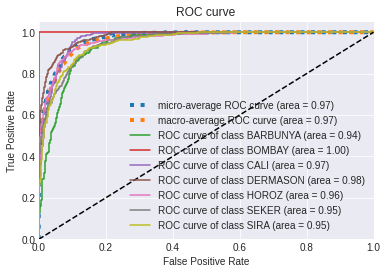

In [18]:
# reference from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
le = preprocessing.LabelEncoder()
le.fit(y)
y_new = le.transform(y)
y_new = label_binarize(y_new, classes=[0,1,2,3,4,5,6])
y_ne2 = le.transform(y)
y_ = np.concatenate((y_new,y_ne2.reshape(len(y),1)), axis = 1)

n = y_new.shape[1]


X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.2, random_state=0)

model = GaussianNB()
model.fit(X_train, y_train[:,-1])

y_pred = model.predict(X_test)
y_pred = label_binarize(y_pred, classes=[0,1,2,3,4,5,6])

y_score = model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test[:,:-1].ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    # color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    # color="navy",
    linestyle=":",
    linewidth=4,
)

for i in range(n):
    plt.plot(
        fpr[i],
        tpr[i],
        label="ROC curve of class {0} (area = {1:0.2f})".format(le.classes_[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend(loc="lower right")
plt.show()

### G. Logistic regression

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = LogisticRegression(random_state=0, penalty='l2', solver = 'lbfgs', max_iter= 10000).fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy: ',accuracy_score(y_test, y_pred))
print('recall: ',recall_score(y_test, y_pred, average='macro'))
print('precision: ',precision_score(y_test, y_pred, average='weighted'))
print('F-1 score: ',f1_score(y_test, y_pred, average='macro'))


accuracy:  0.9096584649283878
recall:  0.9182631649807457
precision:  0.9100869138655285
F-1 score:  0.9204903332380916
